<a href="https://colab.research.google.com/github/arandi-ar/feature_engineering-/blob/main/Basic_Feature_Engineering_in_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
pip install sklearn

In [15]:
!wget https://raw.githubusercontent.com/gstripling/training-data-analyst/master/housing_pre-proc.csv

--2021-10-27 13:30:24--  https://raw.githubusercontent.com/gstripling/training-data-analyst/master/housing_pre-proc.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1435069 (1.4M) [text/plain]
Saving to: ‘housing_pre-proc.csv.1’

housing_pre-proc.cs 100%[===================>]   1.37M  --.-KB/s    in 0.03s   

2021-10-27 13:30:25 (42.6 MB/s) - ‘housing_pre-proc.csv.1’ saved [1435069/1435069]



In [16]:
import os
import tensorflow.keras

import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

from tensorflow import feature_column as fc
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

print(tf.version.VERSION)

2.6.0


In [17]:
housing_df = pd.read_csv('housing_pre-proc.csv', error_bad_lines=False)
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [18]:
housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# Partiendo el dataset para ML
Tenemos que partirlo el CSV en train, validation y test

In [19]:
train, test = train_test_split(housing_df, test_size=0.2)
train, val = train_test_split(housing_df, test_size=0.2)

Vamos a guardarlos en archivos diferentes

In [20]:
train.to_csv('housing-train.csv', encoding='utf-8', index=False)
val.to_csv('housing-val.csv', encoding='utf-8', index=False)
test.to_csv('housing-test.csv', encoding='utf-8', index=False)

In [21]:
!ls -la

total 4488
drwxr-xr-x 1 root root    4096 Oct 27 13:30 .
drwxr-xr-x 1 root root    4096 Oct 27 13:11 ..
drwxr-xr-x 4 root root    4096 Oct  8 13:44 .config
-rw-r--r-- 1 root root 1435069 Oct 27 13:24 housing_pre-proc.csv
-rw-r--r-- 1 root root 1435069 Oct 27 13:30 housing_pre-proc.csv.1
-rw-r--r-- 1 root root  282691 Oct 27 13:30 housing-test.csv
-rw-r--r-- 1 root root 1129748 Oct 27 13:30 housing-train.csv
-rw-r--r-- 1 root root  282800 Oct 27 13:30 housing-val.csv
drwxr-xr-x 1 root root    4096 Oct  8 13:45 sample_data


# Lab1: crear un input pipeline usando tf.data

A continuacion vamos a encapsular el dataframe con tf.data. Esto nos va a permitir usar feature columns como un puente para mapear las columnas en el dataframe de pandas con los features usados para entrenar el modelo

In [22]:
def df_to_dataset(dataframe, shuffle=True, batch_size=32):
  dataframe = dataframe.copy()
  labels = dataframe.pop('median_house_value')
  ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  return ds

A continuacipon inicializamos los dataset de entrenamiento y validacion

In [23]:
batch_size = 32
train_ds = df_to_dataset(train)
val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)

In [24]:
# vamos a ver que nos trae

for feature_batch, label_batch in train_ds.take(1):
  print('todas las features', list(feature_batch.keys()))
  print('Un batch de households', feature_batch['households'])
  print('Un batch de ocean_proximity', feature_batch['ocean_proximity'])
  print('A batch of targets', label_batch)

todas las features ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity']
Un batch de households tf.Tensor(
[ 659. 1067.  162.  515.   70.  705.  237.  463.  150.  574.  664. 1333.
  295.  409.  447.  131.  519.  446.   66.  706.  301.  356.  596.  766.
  202. 3510.  338.  505.  454.  667.  209.  254.], shape=(32,), dtype=float64)
Un batch de ocean_proximity tf.Tensor(
[b'<1H OCEAN' b'INLAND' b'<1H OCEAN' b'INLAND' b'NEAR BAY' b'INLAND'
 b'<1H OCEAN' b'INLAND' b'INLAND' b'NEAR BAY' b'NEAR OCEAN' b'<1H OCEAN'
 b'<1H OCEAN' b'<1H OCEAN' b'INLAND' b'INLAND' b'NEAR BAY' b'<1H OCEAN'
 b'INLAND' b'<1H OCEAN' b'NEAR BAY' b'INLAND' b'NEAR BAY' b'INLAND'
 b'<1H OCEAN' b'<1H OCEAN' b'<1H OCEAN' b'INLAND' b'<1H OCEAN' b'INLAND'
 b'INLAND' b'INLAND'], shape=(32,), dtype=string)
A batch of targets tf.Tensor(
[137500. 200200. 103100. 132300. 335000. 165100. 365200. 110900. 103100.
 425500. 142900. 190400.  7720

## Columnas numericas
La salida de una feature column se convierte en la entrada del modelo

In [25]:
numeric_cols = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
                'total_bedrooms', 'population', 'households', 'median_income']

## Scaler function
Es muy importante que todas las variables numericas este normalizadas antes de subirla

In [26]:
def get_scal(feature):
  def minmax(x):
    mini = train[feature].min()
    maxi = train[feature].max()
    return (x - mini)/(maxi-mini)
    return(minmax)

In [29]:
feature_columns = []
for header in numeric_cols:
  scal_input_fn = get_scal(header)
  feature_columns.append(fc.numeric_column(header,
                                         normalizer_fn=scal_input_fn))

In [30]:
print('Total number of feature columns: ', len(feature_columns))

Total number of feature columns:  8


## Usando keras modelos secuencial

In [34]:
feature_layer = tf.keras.layers.DenseFeatures(feature_columns, dtype='float64')

model = tf.keras.Sequential([
  feature_layer,
  layers.Dense(12, input_dim=8, activation='relu'),
  layers.Dense(8, activation='relu'),
  layers.Dense(1, activation='linear', name='median_house_value')
])

model.compile(optimizer='adam',
              loss='mse',
              metrics=['mse'])

history = model.fit(train_ds,
                    validation_data=val_ds,
                    epochs=32)

Epoch 1/32
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
487/511 [===========================>..] - ETA: 0s - loss: 48820461568.0000 - mse: 48820461568.0000WARNING:tensorflow:Layers in a Sequential model should only have a single input tensor, but we receive a <class 'dict'> input: {'longitude': <tf.Tensor 'ExpandDims_3:0' shape=(None, 1) dtype=float64>, 'latitude': <tf.Tensor 'ExpandDims_2:0' shape=(None, 1) dtype=float64>, 'housing_median_age': <tf.Tensor 'ExpandDims_1:0' shape=(None, 1) dtype=float64>, 'total_rooms': <tf.Tensor 'ExpandDims_8:0' shape=(None, 1) dtype=float64>, 'total_bedrooms': <tf.Tensor 'ExpandDims_7:0' shape=(None, 1) dtype=float64>, 'population': <tf.Tensor 'ExpandDims_6:0' shape=(None, 1) dtype=float64>, 'households': <tf.Tensor 'ExpandDims:0' shape=(None, 1) dtype=float64>, 'median_income': <tf.Tensor 'ExpandDims_4:0' shape=(None, 1) dtype=float64>, 'ocean_proximity': <tf.Tensor 'ExpandDims_5:0' sh

In [35]:
loss, mse = model.evaluate(train_ds)
print("Mean Squared Error", mse)

511/511 [==============================] - 1s 2ms/step - loss: 9963803648.0000 - mse: 9963803648.0000
Mean Squared Error 9963803648.0


## Visualizar la curva loss del modelo

In [41]:
def plot_curves(history, metrics):
  nrows = 1
  ncols = 2
  fig = plt.figure(figsize=(10, 5))

  for idx, key in enumerate(metrics):
    ax = fig.add_subplot(nrows, ncols, idx+1)
    plt.plot(history.history[key])
    plt.plot(history.history['val_{}'.format(key)])
    plt.title('model {}'.format(key))
    plt.ylabel(key)
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')

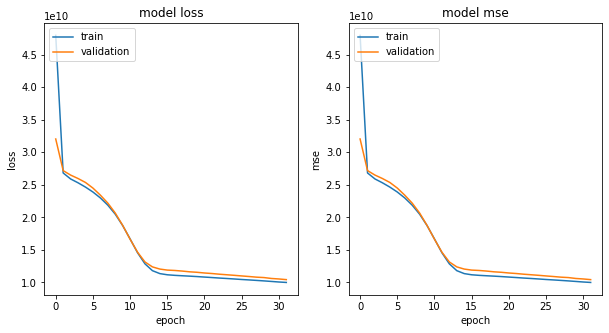

In [42]:
plot_curves(history, ['loss', 'mse'])

## Cargamos los datos de test

In [43]:
test_data = pd.read_csv('housing-test.csv')
test_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000
mean,-119.522721,35.592048,28.753609,2611.853193,536.465378,1426.761683,496.924150,3.881323,205774.208466
std,2.001184,2.127375,12.208389,2120.406795,422.443031,1232.420661,384.651056,1.885586,114906.102260
min,-124.300000,32.560000,1.000000,2.000000,2.000000,6.000000,2.000000,0.499900,14999.000000
25%,-121.700000,33.930000,18.000000,1426.500000,292.000000,791.000000,276.000000,2.568500,121800.000000
50%,-118.460000,34.220000,29.000000,2109.000000,430.000000,1164.000000,404.000000,3.553600,178200.000000
75%,-117.990000,37.700000,37.000000,3149.000000,646.000000,1699.000000,604.000000,4.743150,261300.000000
max,-114.310000,41.920000,52.000000,27700.000000,4819.000000,35682.000000,4769.000000,15.000100,500001.000000


In [44]:
def test_input_fn(features, batch_size=256):
  return tf.data.Dataset.from_tensor_slices(dict(features)).batch(batch_size)

In [45]:
test_predict = test_input_fn(dict(test_data))

In [47]:
predicted_median_house_value = model.predict(test_predict)
print(predicted_median_house_value)

[[214268.1 ]
 [220922.61]
 [180103.3 ]
 ...
 [198346.3 ]
 [211537.97]
 [330057.  ]]


# Lab 2: Creando features numericos y categoricos


In [71]:
numeric_cols = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 
                'total_bedrooms', 'population', 'households', 'median_income']

bucketized_cols = ['housing_median_age']

categorical_cols = ['ocean_proximity']


In [72]:
def get_scal(feature):
  def minmax(x):
    mini = train[feature].min()
    maxi = train[feature].max()
    return (x - mini)/(maxi - mini)
    return(minmax)

In [73]:
feature_columns = []
for header in numeric_cols:
  scal_input_fn = get_scal(header)
  feature_columns.append(fc.numeric_column(header, 
                                            normalizer_fn=scal_input_fn))

### One hot encode categorical feature

In [74]:
for feature_name in categorical_cols:
  vocabulary = housing_df[feature_name].unique()
  categorical_c = fc.categorical_column_with_vocabulary_list(feature_name, vocabulary)
  one_hot = fc.indicator_column(categorical_c)
  feature_columns.append(one_hot)

### Bucketized feature

In [75]:
age = fc.numeric_column("housing_median_age")

age_buckets = fc.bucketized_column(age, boundaries=[10,20,30,40,50,60,80,100])
feature_columns.append(age_buckets)

### Feature cross
Combinand varias features a una sola

In [76]:
vocabulary = housing_df['ocean_proximity'].unique()
ocean_proximity = fc.categorical_column_with_vocabulary_list('ocean_proximity', 
                                                             vocabulary)

crossed_feature = fc.crossed_column([age_buckets, ocean_proximity], 
                                    hash_bucket_size=1000)
crossed_feature = fc.indicator_column(crossed_feature)
feature_columns.append(crossed_feature)

In [68]:
print('Total number of feature columns: ', len(feature_columns))

Total number of feature columns:  11


In [77]:
feature_layer = tf.keras.layers.DenseFeatures(feature_columns, dtype='float64')

model = tf.keras.Sequential([
                             feature_layer,
                             layers.Dense(12, input_dim=8, activation='relu'),
                             layers.Dense(8, activation='relu'),
                             layers.Dense(1, activation='linear', name='median_house_value')
])

model.compile(optimizer='adam', loss='mse', metrics=['mse'])

history = model.fit(train_ds, validation_data=val_ds, epochs=32)

Epoch 1/32
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
499/511 [============================>.] - ETA: 0s - loss: 46269411328.0000 - mse: 46269411328.0000WARNING:tensorflow:Layers in a Sequential model should only have a single input tensor, but we receive a <class 'dict'> input: {'longitude': <tf.Tensor 'ExpandDims_3:0' shape=(None, 1) dtype=float64>, 'latitude': <tf.Tensor 'ExpandDims_2:0' shape=(None, 1) dtype=float64>, 'housing_median_age': <tf.Tensor 'ExpandDims_1:0' shape=(None, 1) dtype=float64>, 'total_rooms': <tf.Tensor 'ExpandDims_8:0' shape=(None, 1) dtype=float64>, 'total_bedrooms': <tf.Tensor 'ExpandDims_7:0' shape=(None, 1) dtype=float64>, 'population': <tf.Tensor 'ExpandDims_6:0' shape=(None, 1) dtype=float64>, 'households': <tf.Tensor 'ExpandDims:0' shape=(None, 1) dtype=float64>, 'median_income': <tf.Tensor 'ExpandDims_4:0' shape=(None, 1) dtype=float64>, 'ocean_proximity': <tf.Tensor 'ExpandDims_5:0' sh

In [78]:
loss, mse = model.evaluate(train_ds)
print("mean squared error", mse)

511/511 [==============================] - 1s 2ms/step - loss: 10039212032.0000 - mse: 10039212032.0000
mean squared error 10039212032.0


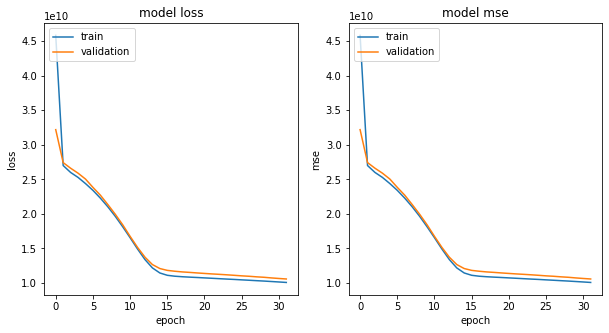

In [79]:
plot_curves(history, ['loss', 'mse'])